In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
billionaires = pd.read_csv('Billionaires Statistics Dataset.csv')
billionaires.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [4]:
income_inequality = pd.read_csv("Inequality in Income.csv")
income_inequality.head()

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in income (2010),Inequality in income (2011),Inequality in income (2012),Inequality in income (2013),Inequality in income (2014),Inequality in income (2015),Inequality in income (2016),Inequality in income (2017),Inequality in income (2018),Inequality in income (2019),Inequality in income (2020),Inequality in income (2021)
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,10.76700,10.76700,10.767000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,24.45400,28.94534,28.945340,28.945340,28.945340,28.945340,28.877330,28.877330,28.87733,28.87733,28.87733,28.87733
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,18.33096,18.33096,12.237393,12.237393,12.237393,12.237393,12.237393,12.237393,13.17898,13.17898,13.17898,13.17898
3,AND,Andorra,Europe,Northern Hemisphere,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
labor_force = pd.read_csv("Labor Force Participation Rate.csv")
labor_force.head()

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value,Disaggregation
0,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Africa Eastern and Southern,AFE,2022,64.983113,"female, 15+, Modeled"
1,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Africa Eastern and Southern,AFE,2021,64.434433,"female, 15+, Modeled"
2,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Africa Eastern and Southern,AFE,2020,63.756308,"female, 15+, Modeled"
3,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Africa Eastern and Southern,AFE,2019,64.766485,"female, 15+, Modeled"
4,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,Africa Eastern and Southern,AFE,2018,64.643364,"female, 15+, Modeled"


In [13]:
billionaires.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [7]:
billionaires.shape

(2640, 35)

/Users/erinzhan/SI618/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/erinzhan/SI618/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


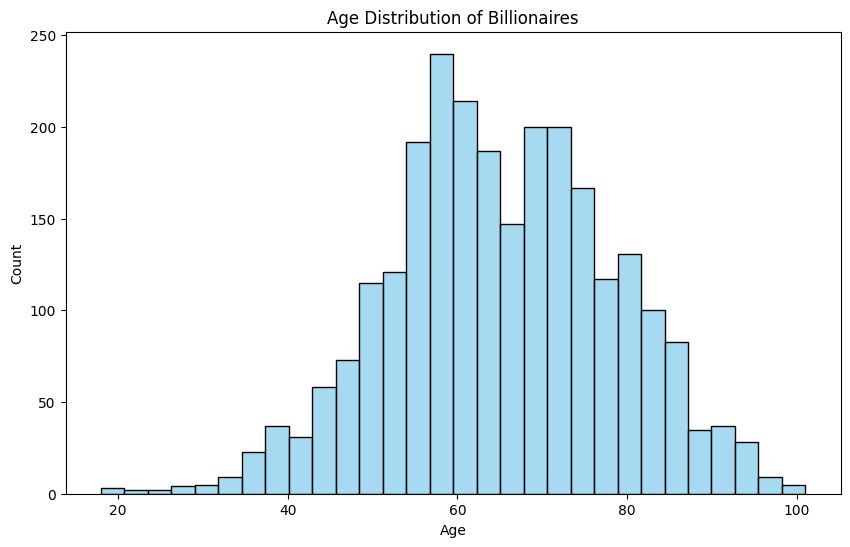

/Users/erinzhan/SI618/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/erinzhan/SI618/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/erinzhan/SI618/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


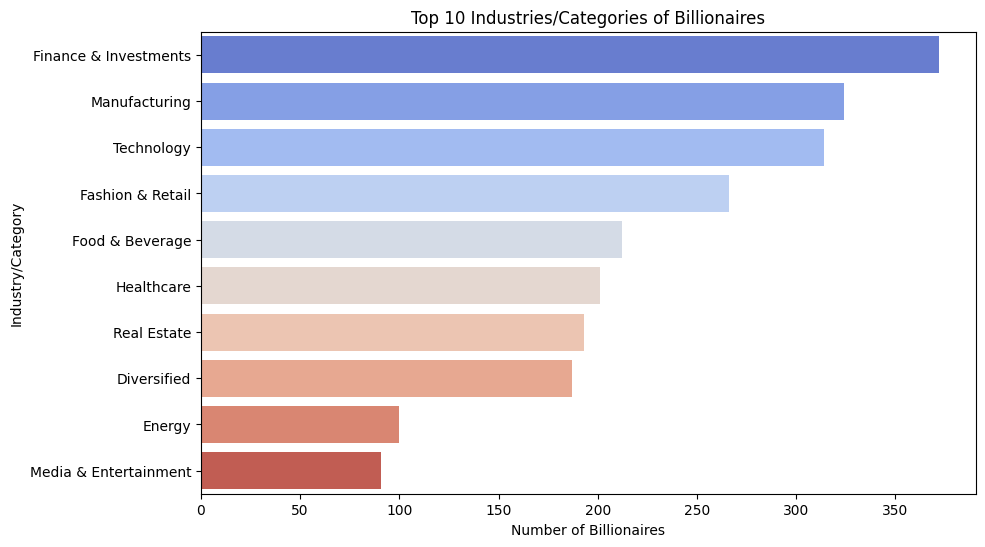

/Users/erinzhan/SI618/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/erinzhan/SI618/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/erinzhan/SI618/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


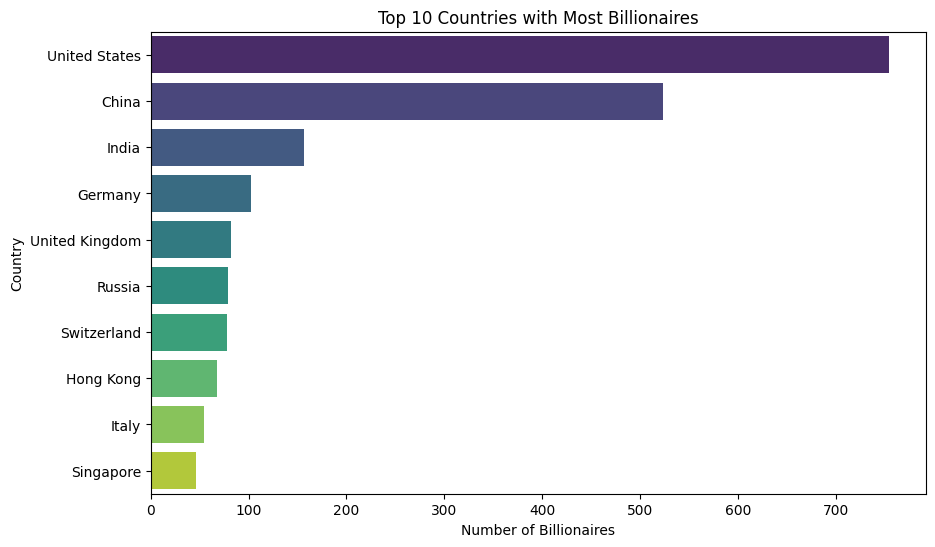

In [27]:
#Cleaning and visualizing the Billionaires Dataset

#Correct data types
#Convert 'gdp_country' to float, remove dollar signs and commas
billionaires['gdp_country'] = billionaires['gdp_country'].replace('[\$,]', '', 
regex=True).astype(float)

# Visualization 1: Histogram of Ages
plt.figure(figsize=(10, 6))
sns.histplot(billionaires['age'].dropna(), kde=False, color='skyblue')
plt.title('Age Distribution of Billionaires')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Visualization 2: Bar Chart of Top Industries
plt.figure(figsize=(10, 6))
top_categories = billionaires['category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='coolwarm')
plt.title('Top 10 Industries/Categories of Billionaires')
plt.xlabel('Number of Billionaires')
plt.ylabel('Industry/Category')
plt.show()

# Visualization 3: Geographic Distribution
plt.figure(figsize=(10, 6))
top_countries = billionaires['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Billionaires')
plt.xlabel('Number of Billionaires')
plt.ylabel('Country')
plt.show()

In [28]:
income_inequality.describe()

,HDI Rank (2021),Inequality in income (2010),Inequality in income (2011),Inequality in income (2012),Inequality in income (2013),Inequality in income (2014),Inequality in income (2015),Inequality in income (2016),Inequality in income (2017),Inequality in income (2018),Inequality in income (2019),Inequality in income (2020),Inequality in income (2021)
count,191.000000,133.000000,142.000000,147.000000,153.000000,154.000000,153.000000,154.000000,153.000000,156.000000,157.000000,160.000000,160.000000
mean,95.811518,24.315915,23.998923,24.059115,23.756587,23.631926,23.276751,23.437117,23.356497,23.156230,23.118396,22.808170,22.808170
std,55.307333,10.762789,10.596861,10.831429,10.212251,10.155927,9.806431,9.690513,9.738382,9.726570,9.702511,9.664903,9.664903
min,1.000000,5.845034,5.845034,5.845034,5.845034,5.845034,5.845034,8.524723,8.524723,8.524723,8.524723,8.305240,8.305240
25%,48.500000,17.325000,17.274975,16.873130,16.200680,16.191820,16.147120,16.337580,16.130000,16.445524,16.556550,16.529762,16.529762
50%,96.000000,22.600000,22.275770,22.407570,21.803230,21.347845,21.422730,22.169790,21.804750,21.526705,21.434030,20.913235,20.913235
75%,143.500000,30.728920,30.153738,30.125422,28.945340,29.245352,28.500000,28.477500,28.394540,28.303420,28.099767,28.062632,28.062632
max,191.000000,68.337000,68.337000,68.337000,56.013380,56.013380,56.124000,56.124000,56.996000,56.996000,56.996000,56.996000,56.996000


In [31]:
#Cleaning the Income Inequality Dataset and Labor Force Participation Rate Dataset
income_inequality = income_inequality.dropna()


(195, 19)

In [34]:
#Merge Datasets
merged_df = pd.merge(billionaires, income_inequality, left_on='country', 
            right_on='Country', how='left')

final_df = pd.merge(merged_df, labor_force[['Country Name', 'Year', 'Value', 
            'Disaggregation']], left_on='country', right_on='Country Name', 
            how='inner')

final_df

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,Inequality in income (2016),Inequality in income (2017),Inequality in income (2018),Inequality in income (2019),Inequality in income (2020),Inequality in income (2021),Country Name,Year,Value,Disaggregation
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,13.58492,14.37160,13.36567,13.36567,13.91798,13.91798,France,2022,52.549,"female, 15+, Modeled"
1,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,13.58492,14.37160,13.36567,13.36567,13.91798,13.91798,France,2021,52.204,"female, 15+, Modeled"
2,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,13.58492,14.37160,13.36567,13.36567,13.91798,13.91798,France,2020,50.626,"female, 15+, Modeled"
3,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,13.58492,14.37160,13.36567,13.36567,13.91798,13.91798,France,2019,51.256,"female, 15+, Modeled"
4,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,13.58492,14.37160,13.36567,13.36567,13.91798,13.91798,France,2018,51.430,"female, 15+, Modeled"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214925,2259,1200,Finance & Investments,Ruben Vardanyan & family,54.0,Armenia,Erevan,Investment banking,Finance & Investments,Armenia,...,17.43837,17.43837,17.43837,17.43837,17.43837,17.43837,Armenia,1994,70.280,"total, 15-64, Modeled"
1214926,2259,1200,Finance & Investments,Ruben Vardanyan & family,54.0,Armenia,Erevan,Investment banking,Finance & Investments,Armenia,...,17.43837,17.43837,17.43837,17.43837,17.43837,17.43837,Armenia,1993,70.282,"total, 15-64, Modeled"
1214927,2259,1200,Finance & Investments,Ruben Vardanyan & family,54.0,Armenia,Erevan,Investment banking,Finance & Investments,Armenia,...,17.43837,17.43837,17.43837,17.43837,17.43837,17.43837,Armenia,1992,70.265,"total, 15-64, Modeled"
1214928,2259,1200,Finance & Investments,Ruben Vardanyan & family,54.0,Armenia,Erevan,Investment banking,Finance & Investments,Armenia,...,17.43837,17.43837,17.43837,17.43837,17.43837,17.43837,Armenia,1991,70.193,"total, 15-64, Modeled"
